<a href="https://colab.research.google.com/github/KwakuBonfulBosompim/MSc-Data-Analytics-and-ML-Projects/blob/main/portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***INTRODUCTION***

In [ ]:
# this project is about portfolio optimization
# We already have the stocks we want to invest in
# which are Apple, Microsoft, Amazon, Alphabet (Google), NVIDIA, and Oracle
# so the question is how do we combine these stocks in the smart way so that
# i. we make the best return at the lowest possible risk
# ii. we well balance the investment so that we don't rely one company

In [ ]:
# so it's all about finding the best mix(percentages) of each stock that gives the highest reward for the least amount of risk

In [ ]:
# So we will extract their respective historical prices (the selected stocks)
# Calculate their returns and risks
# Simulate thousands of portfolio combinations
# find the one with the highest Sharpe Ration(best risk-adjusted return)
# Plot the Efficient Frontier-a visual of the best possible portfolio

***DATA COLLECTION & EXPLORATORY DATA ANALYSIS***

In [ ]:
# We import yfinance and download Data
import yfinance as yf

# the tickers for the following stocks
# ( Meta, Apple, Amazon, Tesla, Samsung And Oracle)

tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NVDA', 'ORCL']

data = yf.download(tickers, start='2020-01-01', end='2024-01-01', group_by=tickers)
data.head()
# YYYY-MM-DD 2020-01-01 = January 1st, 2020  & 2024-01-01 = January 1st, 2024
# group_by='ticker' how yfinance should organize the data to get clean, separated groups of data

/tmp/ipython-input-415-1594544645.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2020-01-01', end='2024-01-01', group_by=tickers)
[*********************100%***********************]  6 of 6 completed


Ticker           AMZN                                                 GOOGL  \
Price            Open       High        Low      Close    Volume       Open   
Date                                                                          
2020-01-02  93.750000  94.900497  93.207497  94.900497  80580000  67.018562   
2020-01-03  93.224998  94.309998  93.224998  93.748497  75288000  66.998193   
2020-01-06  93.000000  95.184502  93.000000  95.143997  81236000  67.178606   
2020-01-07  95.224998  95.694504  94.601997  95.343002  80898000  69.605552   
2020-01-08  94.902000  95.550003  94.321999  94.598503  70160000  69.325228   

Ticker                                                 ...       ORCL  \
Price            High        Low      Close    Volume  ...       Open   
Date                                                   ...              
2020-01-02  68.026016  66.923134  68.026016  27278000  ...  48.913051   
2020-01-03  68.278016  66.964392  67.670158  23408000  ...  48.655954   
2020-01-06  69.499192  67.147300  69.473846  46768000  ...  48.995692   
2020-01-07  69.756647  69.163206  69.339645  34330000  ...  49.482342   
2020-01-08  70.171653  69.216384  69.833183  35314000  ...  49.748700   

Ticker                                                     NVDA            \
Price            High        Low      Close    Volume      Open      High   
Date                                                                        
2020-01-02  49.546614  48.876321  49.537434  13899600  5.942872  5.971746   
2020-01-03  49.629254  48.619224  49.362972  11026700  5.852018  5.919972   
2020-01-06  49.766989  48.986508  49.620075  10982400  5.782819  5.906033   
2020-01-07  49.886356  49.225244  49.730259  12015400  5.929182  6.018045   
2020-01-08  50.357416  49.527351  49.923939  11856700  5.968012  6.024765   

Ticker                                     
Price            Low     Close     Volume  
Date                                       
2020-01-02  5.892342  5.971746  237536000  
2020-01-03  5.827126  5.876163  205384000  
2020-01-06  5.756683  5.900805  262636000  
2020-01-07  5.884128  5.972244  314856000  
2020-01-08  5.927937  5.983445  277108000  

[5 rows x 30 columns]

In [ ]:
data.tail()

Ticker            AMZN                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2023-12-22  153.770004  154.350006  152.710007  153.419998  29514100   
2023-12-26  153.559998  153.979996  153.029999  153.410004  25067200   
2023-12-27  153.559998  154.779999  153.119995  153.339996  31434700   
2023-12-28  153.720001  154.080002  152.949997  153.380005  27057000   
2023-12-29  153.100006  153.889999  151.029999  151.940002  39823200   

Ticker           GOOGL                                                ...  \
Price             Open        High         Low       Close    Volume  ...   
Date                                                                  ...   
2023-12-22  139.930791  141.143519  139.871151  140.646500  26532200  ...   
2023-12-26  140.745890  141.829388  140.348281  140.676315  16780300  ...   
2023-12-27  140.745901  141.232985  139.056038  139.533173  19628600  ...   
2023-12-28  139.940721  140.298576  138.916863  139.393997  16045700  ...   
2023-12-29  138.797599  139.523243  137.952660  138.857239  18733000  ...   

Ticker            ORCL                                               \
Price             Open        High         Low       Close   Volume   
Date                                                                  
2023-12-22  103.574044  104.348156  103.338874  104.063988  5680000   
2023-12-26  104.377549  104.504939  103.221282  104.054192  5767400   
2023-12-27  104.181574  104.191375  103.436858  103.809219  5627400   
2023-12-28  103.877813  104.465744  103.456461  104.112984  5689100   
2023-12-29  104.455945  104.769508  102.672551  103.309479  6899700   

Ticker           NVDA                                              
Price            Open       High        Low      Close     Volume  
Date                                                               
2023-12-22  49.173116  49.361033  48.445440  48.808281  252507000  
2023-12-26  48.946214  49.577933  48.938218  49.257076  244200000  
2023-12-27  49.488979  49.657903  49.063166  49.395020  233648000  
2023-12-28  49.620922  49.861812  49.390022  49.499973  246587000  
2023-12-29  49.790844  49.974764  48.729316  49.499973  389293000  

[5 rows x 30 columns]

In [ ]:
#| Column Name   | What it means                                                                                 |
#| ------------- | --------------------------------------------------------------------------------------------- |
#| **Open**      | Price at which the stock started trading that day                                             |
#| **High**      | Highest price the stock reached during the trading day                                        |
#| **Low**       | Lowest price the stock reached during the trading day                                         |
#| **Close**     | Price at which the stock ended trading that day                                               |
#| **Adj Close** | Adjusted Close Price — Close price adjusted for corporate actions like dividends, splits etc. |
#| **Volume**    | Number of shares traded during the day                                                        |


In [ ]:
apple_data = data['AAPL']
print(apple_data.head())
print("\n" * 3)
print(apple_data.tail())

Price            Open       High        Low      Close     Volume
Date                                                             
2020-01-02  71.627092  72.681289  71.373218  72.620842  135480400
2020-01-03  71.847125  72.676454  71.689965  71.914825  146322800
2020-01-06  71.034717  72.526541  70.783256  72.487854  118387200
2020-01-07  72.497529  72.753823  71.926915  72.146942  108872000
2020-01-08  71.849533  73.609745  71.849533  73.307510  132079200




Price             Open        High         Low       Close    Volume
Date                                                                
2023-12-22  193.761066  193.989405  191.567141  192.192566  37149600
2023-12-26  192.202472  192.480435  191.428144  191.646545  28919300
2023-12-27  191.090629  192.093281  189.700797  191.745819  48087700
2023-12-28  192.728625  193.244849  191.765676  192.172699  34049900
2023-12-29  192.490361  192.986726  190.336138  191.130325  42672100


In [ ]:
print(data.describe(), "\n\n")
# count Number of non-missing (non-NaN) - values Number of trading days included (e.g., 1006 days of data)
# mean Average value eg. Mean = ~$108.44 average opening price
# std Standard deviation (how spread out the data is) eg. Std dev = ~25.12 means price varies a lot daily
# 25%	25th percentile (first quartile)
# 50%	Median (middle value)
# 75%	75th percentile (third quartile)
# max	Maximum value

Ticker         AMZN                                                       \
Price          Open         High          Low        Close        Volume   
count   1006.000000  1006.000000  1006.000000  1006.000000  1.006000e+03   
mean     137.255245   139.034453   135.376526   137.216247  7.538060e+07   
std       27.576463    27.607319    27.413947    27.468805  3.382786e+07   
min       82.075500    83.480003    81.301498    81.820000  2.237840e+07   
25%      113.835001   116.115000   112.434999   114.309002  5.278502e+07   
50%      140.830254   143.375000   138.939751   140.585007  6.577000e+07   
75%      161.148872   162.888756   159.206749   161.190620  8.729165e+07   
max      187.199997   188.654007   184.839493   186.570496  3.113460e+08   

Ticker        GOOGL                                                       ...  \
Price          Open         High          Low        Close        Volume  ...   
count   1006.000000  1006.000000  1006.000000  1006.000000  1.006000e+03  ...

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (AMZN, Open)     1006 non-null   float64
 1   (AMZN, High)     1006 non-null   float64
 2   (AMZN, Low)      1006 non-null   float64
 3   (AMZN, Close)    1006 non-null   float64
 4   (AMZN, Volume)   1006 non-null   int64  
 5   (GOOGL, Open)    1006 non-null   float64
 6   (GOOGL, High)    1006 non-null   float64
 7   (GOOGL, Low)     1006 non-null   float64
 8   (GOOGL, Close)   1006 non-null   float64
 9   (GOOGL, Volume)  1006 non-null   int64  
 10  (MSFT, Open)     1006 non-null   float64
 11  (MSFT, High)     1006 non-null   float64
 12  (MSFT, Low)      1006 non-null   float64
 13  (MSFT, Close)    1006 non-null   float64
 14  (MSFT, Volume)   1006 non-null   int64  
 15  (AAPL, Open)     1006 non-null   float64
 16  (AAPL, High)     1006 non-null   float64
 

In [ ]:
# Now we visualize to understand the relationship between the stocks
# Line Plot of Adjusted Close Prices over time
# Correlation Heatmap of daily returns
# Volatility & Return Distribution

In [ ]:
adj_close = data.xs('Close', axis=1, level=1)
adj_close.head()

Ticker,AMZN,GOOGL,MSFT,AAPL,ORCL,NVDA
Date,,,,,,
2020-01-02,94.900497,68.026016,153.042313,72.620842,49.537434,5.971746
2020-01-03,93.748497,67.670158,151.136673,71.914825,49.362972,5.876163
2020-01-06,95.143997,69.473846,151.527374,72.487854,49.620075,5.900805
2020-01-07,95.343002,69.339645,150.145737,72.146942,49.730259,5.972244
2020-01-08,94.598503,69.833183,152.537292,73.307510,49.923939,5.983445


In [ ]:
adj_close.tail()

Ticker,AMZN,GOOGL,MSFT,AAPL,ORCL,NVDA
Date,,,,,,
2023-12-22,153.419998,140.646500,370.375763,192.192566,104.063988,48.808281
2023-12-26,153.410004,140.676315,370.454865,191.646545,104.054192,49.257076
2023-12-27,153.339996,139.533173,369.871429,191.745819,103.809219,49.395020
2023-12-28,153.380005,139.393997,371.067932,192.172699,104.112984,49.499973
2023-12-29,151.940002,138.857239,371.819336,191.130325,103.309479,49.499973


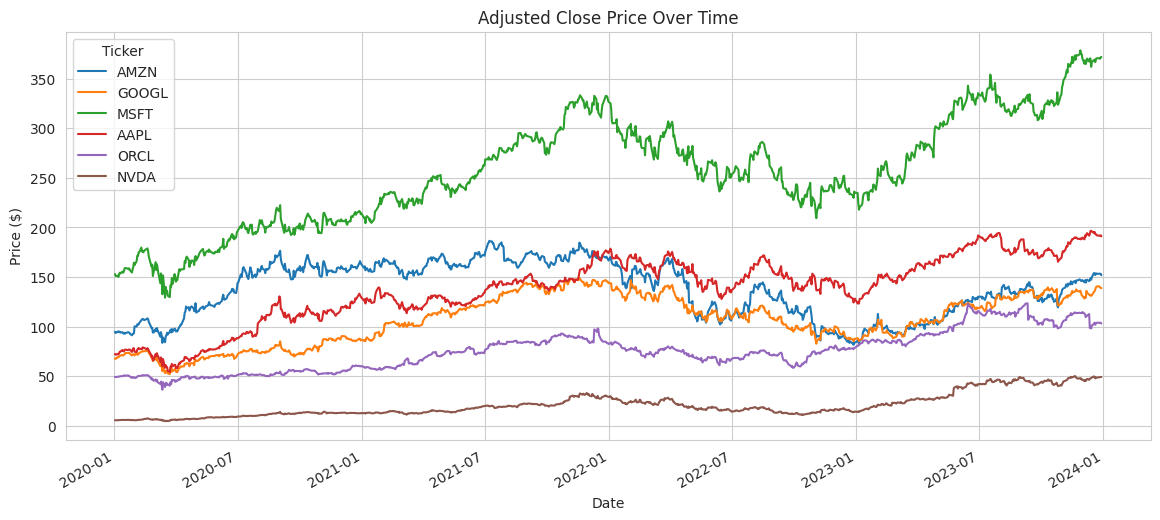

In [ ]:
# Now plotting the Adjusted Close Prices
import matplotlib.pyplot as plt
adj_close.plot(figsize=(14, 6), title="Adjusted Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()

In [ ]:
# Each line in the plot represents the Adjusted Close Price of the selected company from January 2020 to January 2024
# the price investors and analysts use to measure growth, returns, and build models like portfolio optimization

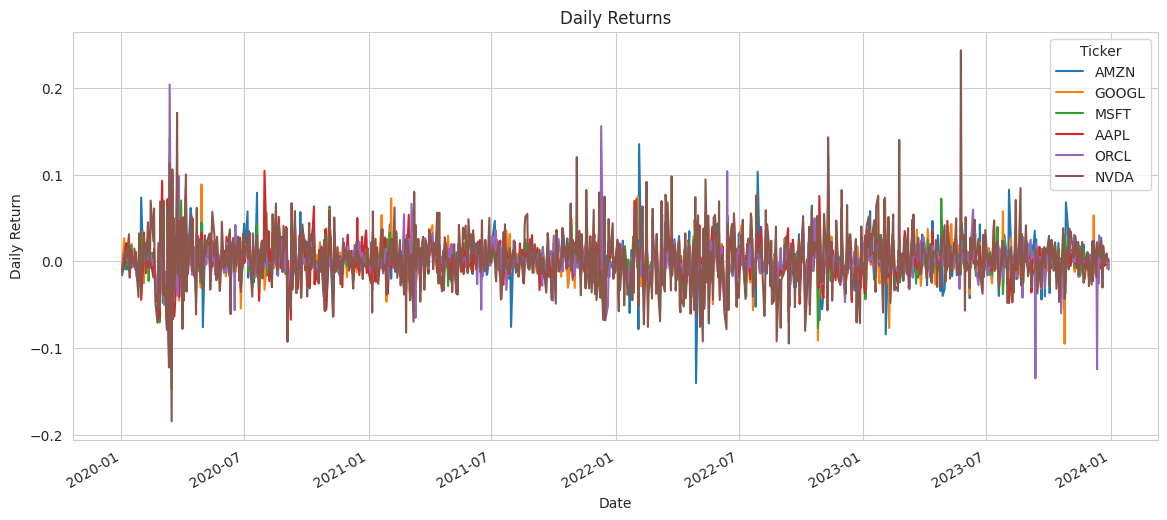

In [ ]:
# Now the Daily Returns Plot
# This shows how the daily percentage change in stock prices fluctuates — it gives a sense of volatility and how often prices jump up or down
import seaborn as sns
returns = adj_close.pct_change().dropna()
returns.plot(figsize=(14, 6), title="Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

In [ ]:
returns.head()

Ticker,AMZN,GOOGL,MSFT,AAPL,ORCL,NVDA
Date,,,,,,
2020-01-03,-0.012139,-0.005231,-0.012452,-0.009722,-0.003522,-0.016006
2020-01-06,0.014886,0.026654,0.002585,0.007968,0.005208,0.004194
2020-01-07,0.002092,-0.001932,-0.009118,-0.004703,0.002221,0.012107
2020-01-08,-0.007809,0.007118,0.015928,0.016086,0.003895,0.001875
2020-01-09,0.004799,0.010498,0.012493,0.021241,0.004618,0.010983


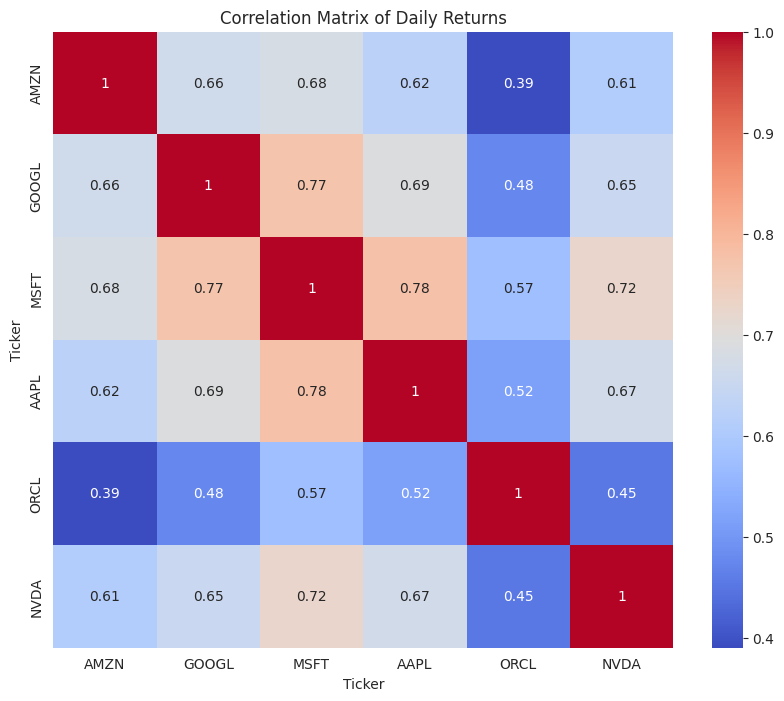

In [ ]:
# Correlation Heatmap
corr_matrix = returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Daily Returns")
plt.show()

In [ ]:
# Each cell in the heatmap shows the correlation coefficient between two variables (e.g., between returns of Apple and Microsoft)
#Values range from -1 to +1:
#+1 (darkest color on positive side) means perfect positive correlation: when one stock goes up, the other also goes up in sync.
#0 (neutral color) means no linear correlation: the stocks move independently.
#-1 (darkest color on negative side) means perfect negative correlation: when one stock goes up, the other goes down exactly.

For our portfolio optimization, we want stocks with low or negative correlations in our portfolio because they reduce overall risk by balancing each other out.

Stocks with high positive correlations tend to move similarly, so they add less diversification benefit.

***PORTFOLIO OPTIMIZATION***

we use the pandas for data manipulation and the numpy for numerical calculations

In [ ]:
import pandas as pd
import numpy as np

returns = adj_close.pct_change().dropna()

In [ ]:
returns.head()
print("\n")
returns.tail()

Ticker,AMZN,GOOGL,MSFT,AAPL,ORCL,NVDA
Date,,,,,,
2023-12-22,-0.002730,0.007620,0.002784,-0.005547,0.003212,-0.003266
2023-12-26,-0.000065,0.000212,0.000214,-0.002841,-0.000094,0.009195
2023-12-27,-0.000456,-0.008126,-0.001575,0.000518,-0.002354,0.002800
2023-12-28,0.000261,-0.000997,0.003235,0.002226,0.002926,0.002125
2023-12-29,-0.009388,-0.003851,0.002025,-0.005424,-0.007718,0.000000


pct_change() calculates the percentage change from one day to the next (daily return)

Don't forget we used the adj close to calculate for the returns
Now we calculate Mean Returns and Covariance Matrix
Mean Returns: The average return we expect from each stock every day.

Covariance Matrix: How much the returns of stocks move together — it helps us measure overall portfolio risk

In [ ]:
mean_returns = returns.mean()
cov_matrix = returns.cov()

Now we Simulate Random Portfolios

In [ ]:
# assuming
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
#np.zeros() creates an array (or matrix) filled with zeros.
#(3, num_portfolios) means this array has 3 rows and num_portfolios columns
for i in range(num_portfolios):
    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)

    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    sharpe_ratio = portfolio_return / portfolio_std_dev

    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    results[2, i] = sharpe_ratio

We choose 3 because we want to store 3 different values for each portfolio:
Portfolio return
Portfolio volatility (risk)
Sharpe ratio (risk-adjusted return)

for i in range(num_portfolios):
This means: “For each portfolio number i from 0 up to (but not including) num_portfolios, do the following steps.”

weights = np.random.random(len(mean_returns))
This line creates an array of random numbers between 0 and 1, one for each stock in your portfolio.
For example, if you have 6 stocks, it creates 6 random numbers — these are the initial “weights” (or how much of your money you put in each stock) but not yet normalized.

weights /= np.sum(weights)
This divides each weight by the sum of all weights to make sure the weights add up to 1 (or 100%).
This means we are converting those random numbers into proportions of your total investment — so your entire portfolio is split into these parts, summing to 100%.

Finding the Portfolio with Highest Sharpe Ratio

In [ ]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]

Explanation:
np.random.random(len(mean_returns)): creates random weights for stocks.
weights /= np.sum(weights): makes sure weights add to 1 (you invest 100% of your money).
portfolio_return: weighted sum of returns, scaled to yearly (252 trading days).
portfolio_std_dev: portfolio risk (volatility), calculated using the covariance matrix and weights.
sharpe_ratio: measures return per unit risk (higher is better).

np.argmax(results[2]): finds which portfolio has the highest Sharpe ratio.

Extract return and volatility for this portfolio

Plotting the Efficient Frontier

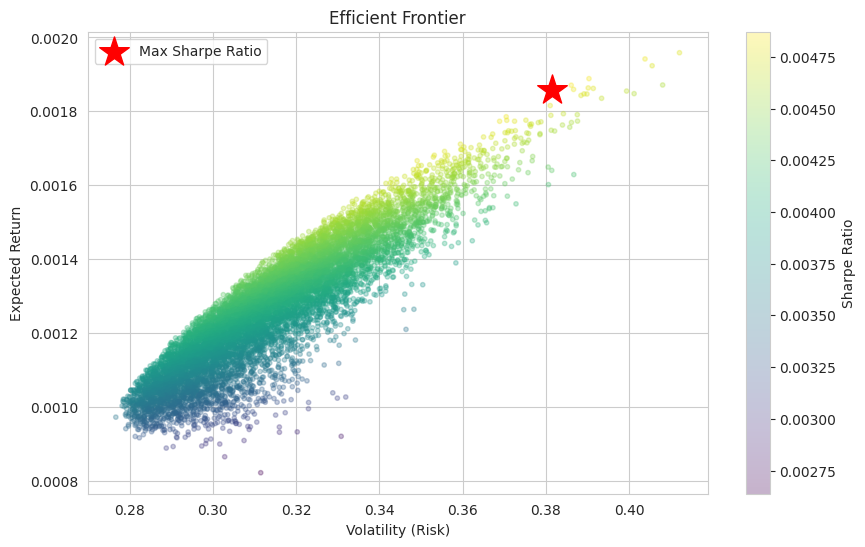

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_volatility, max_sharpe_return, marker='*', color='r', s=500, label='Max Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.legend()
plt.show()

We calculate returns from prices.
Find average return and risk (covariance).
Simulate many portfolios with random weights.
Calculate expected return, risk, and Sharpe ratio for each.
Pick the portfolio with the best Sharpe ratio.
Visualize the results on the efficient frontier.

In [ ]:
optimal_weights = np.zeros(len(mean_returns))

for i in range(num_portfolios):
    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)

    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    sharpe_ratio = portfolio_return / portfolio_std_dev

    if i == max_sharpe_idx:
        optimal_weights = weights
        break

print("Optimal Portfolio Weights:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {optimal_weights[i]:.2%}")

Optimal Portfolio Weights:
AAPL: 4.18%
MSFT: 19.80%
AMZN: 23.65%
GOOGL: 27.05%
NVDA: 17.78%
ORCL: 7.55%


This part of the code is where the final decision is made: how much of our money should go into Apple, Amazon, etc. so we get the best return without taking on too much risk

results[1]: Portfolio risks (standard deviation)

results[0]: Portfolio returns

results[2]: Sharpe ratios (used for coloring)

Red star (*) shows the best portfolio (your goal).

MACHINE LEARNING ANALYSIS

This machine learning model is trying to predict Apple’s stock returns using the returns of other companies in our portfolio (Amazon, Microsoft, Google, NVIDIA, and Oracle)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import yfinance as yf

In [ ]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NVDA', 'ORCL']
data = yf.download(tickers, start='2020-01-01', end='2024-01-01')['Close']

returns = data.pct_change().dropna()

X = returns.drop(columns='AAPL')
y = returns['AAPL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model=LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.6f}")
print("Model Coefficients (influence of each stock):")
for ticker, coef in zip(X.columns, model.coef_):
    print(f"{ticker}: {coef:.6f}")


/tmp/ipython-input-438-3329038741.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2020-01-01', end='2024-01-01')['Close']
[*********************100%***********************]  6 of 6 completed

R² Score: 0.1269
Mean Squared Error: 0.000120
Model Coefficients (influence of each stock):
AMZN: 0.107810
GOOGL: 0.121272
MSFT: 0.464577
NVDA: 0.108139
ORCL: 0.103775


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.6f}")
print("Model Coefficients (influence of each stock):")
for ticker, coef in zip(X.columns, model.coef_):
    print(f"{ticker}: {coef:.6f}")

R² Score: 0.1269
Mean Squared Error: 0.000120
Model Coefficients (influence of each stock):
AMZN: 0.107810
GOOGL: 0.121272
MSFT: 0.464577
NVDA: 0.108139
ORCL: 0.103775


the model is trying to tell us Hey, if Microsoft, Amazon, and Google go up today… there’s a good chance Apple will too

***CONCLUSION***


In this project, we successfully analyzed and optimized a portfolio consisting of six major tech stocks: Apple, Microsoft, Amazon, Alphabet (Google), NVIDIA, and Oracle. By using historical price data, we calculated daily returns and risks, and then simulated thousands of portfolio combinations to identify the optimal mix that maximizes the Sharpe Ratio — achieving the best risk-adjusted return.

Our results revealed a well-diversified portfolio that balances expected return and volatility, reducing reliance on any single company while maximizing growth potential. The Efficient Frontier visualization clearly showed the trade-off between risk and return, with the optimal portfolio marked by the highest Sharpe Ratio.

Additionally, a linear regression model was built to predict Apple’s stock returns based on the returns of the other stocks in the portfolio. While the model showed moderate predictive power (R² ~0.13), it highlighted the relationships among these stocks and suggested that movements in Microsoft, Amazon, and Google have the most significant influence on Apple’s returns.

Overall, this approach combines traditional financial metrics with machine learning insights to create a smarter, data-driven investment strategy that balances return, risk, and diversification effectively.